<a href="https://colab.research.google.com/github/pommland/MinorClass_ML/blob/main/Project/Insurance/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Insurance Sell Dataset

สร้าง model สำหรับทำนายว่าลูกค้าผู้ซื้อกรมธรรม์ประกันสุขภาพในปีก่อน จะมีความสนใจในกรมธรรม์ตัวใหม่ของบริษัท - ประกันอุบัติเหตุรถยนต์ หรือไม่

หลังจากที่ผู้เอาประกัน ได้ทำการตกลงทำตามข้อสัญญา กับทางบริษัทประกันเป็นที่เรียบร้อยแล้ว ผู้เอาประกัน จะต้องมีการจ่ายค่าตอบแทน (premium) ให้กับผู้รับประกัน ซึ่งก็คือบริษัทประกัน ตามจำนวนเงินในสัญญาภายในกรมธรรม์ (policy) และเมื่อเกิดอุบัติเหตุ บาดเจ็บ เสียทรัพย์ ไปจนถึงเสียชีวิต บริษัทประกัน จะทำการวิเคราะห์เหตุการณ์ และตีค่าออกมาเป็นตัวเงินก่อนจะชดเชยให้กับผู้เอาประกัน หรือผู้รับผลประโยชน์ ตามจำนวนเงินในเงื่อนไขภายในกรมธรรม์

### Data Description

| Variable | Definition |
| -------- | ---------- |
| id |	Unique ID for the customer |
| Gender |	Gender of the customer |
| Age |	Age of the customer |
| Driving_License |	0 : Customer does not have Driving License, <br> 1 : Customer already has Driving License |
| Region_Code |	Unique code for the region of the customer |
| Previously_Insured |	1 : Customer already has Vehicle Insurance, <br> 0 : Customer doesn't have Vehicle Insurance
| Vehicle_Age |	Age of the Vehicle |
| Vehicle_Damage |	1 : Customer got his/her vehicle damaged in the past. <br> 0 : Customer did not get his/her vehicle damaged in the past. |
| Annual_Premium |	The amount customer needs to pay as premium in the year |
| PolicySalesChannel |	Anonymized Code for the channel of outreaching to the customer ie <br> Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage |	Number of Days, Customer has been associated with the company |
| Response |	1 : Customer is interested, <br> 0 : Customer is not interested |

### Objective:
model เพื่อทำนายว่าลูกค้าจะสนใจซื้อกรมธรรม์ประกันอุบัติเหตุรถยนต์หรือไม่

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ปี 2 เทอม 2 ปอม/AI_2021/ML/project/insurance_data (1).csv")

# Expore


In [ ]:
print(df.head())

   id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1    Male   44  ...                  26.0      217         1
1   2    Male   76  ...                  26.0      183         0
2   3    Male   47  ...                  26.0       27         1
3   4    Male   21  ...                 152.0      203         0
4   5  Female   29  ...                 152.0       39         0

[5 rows x 12 columns]


In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
(381109, 12)


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## แปลงข้อมูล categorical เป็น numerical

In [ ]:
df.replace(['Male', 'Female'], [1, 0], inplace=True)
df.replace(['Yes', 'No'], [1, 0], inplace=True)
df = pd.get_dummies(df, prefix='vehicle_age', columns=['Vehicle_Age'])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


## ข้อมูลเชิงคุณภาพ

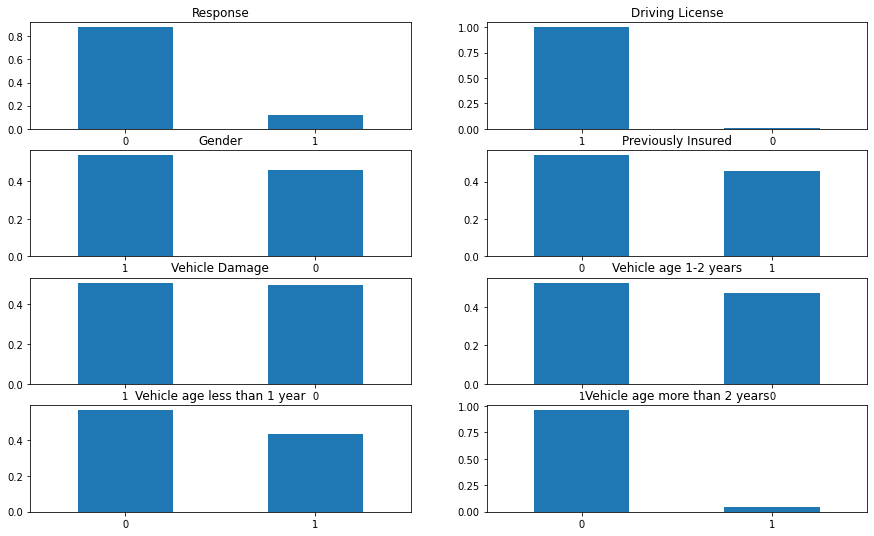

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(421) 
df['Response'].value_counts(normalize=True).plot.bar(title= 'Response',rot=2) 
plt.subplot(422) 
df['Driving_License'].value_counts(normalize=True).plot.bar(title= 'Driving License',rot=2) 
plt.subplot(423) 
df['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',rot=2)
plt.subplot(424) 
df['Previously_Insured'].value_counts(normalize=True).plot.bar(title= 'Previously Insured',rot=2)
plt.subplot(425) 
df['Vehicle_Damage'].value_counts(normalize=True).plot.bar(title= 'Vehicle Damage',rot=2)
plt.subplot(426) 
df['vehicle_age_1-2 Year'].value_counts(normalize=True).plot.bar(title= 'Vehicle age 1-2 years',rot=2)
plt.subplot(427) 
df['vehicle_age_< 1 Year'].value_counts(normalize=True).plot.bar(title= 'Vehicle age less than 1 year',rot=2)
plt.subplot(428) 
df['vehicle_age_> 2 Years'].value_counts(normalize=True).plot.bar(title= 'Vehicle age more than 2 years',rot=2)

##ข้อมูลเชิงปริมาณ

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

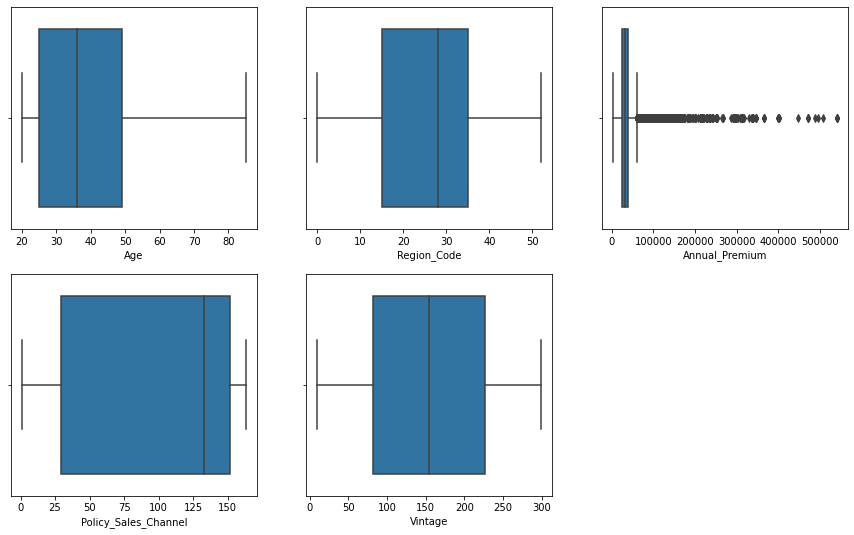

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(231) 
a = sns.boxplot(df['Age'])
plt.subplot(232) 
a = sns.boxplot(df['Region_Code'])
plt.subplot(233) 
a = sns.boxplot(df['Annual_Premium'])
plt.subplot(234) 
a = sns.boxplot(df['Policy_Sales_Channel'])
plt.subplot(235) 
a = sns.boxplot(df['Vintage'])

#Data preparetion
## การเตรียมข้อมูล

In [ ]:
# ตรวจสอบค่า null
df.isna().sum()

id                       0
Gender                   0
Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Vehicle_Damage           0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Response                 0
vehicle_age_1-2 Year     0
vehicle_age_< 1 Year     0
vehicle_age_> 2 Years    0
dtype: int64

In [ ]:
# กำจัด outliner ในตัวแปร Annual_Premium
cal_Q1 = df["Annual_Premium"].quantile(0.25)
cal_Q3 = df["Annual_Premium"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR

df = df[(df["Annual_Premium"] > lower_limit)&(df["Annual_Premium"] < upper_limit)]
df["Annual_Premium"]

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 370789, dtype: float64

## Data imbalance problem
* ตัวแปร Responce มีข้อมูล 2 กลุ่มแตกต่างกันมากจนเกินไป จึงใช้วิธี Random Under-Sampling และ Random Under-Sampling ในการแก้

 <img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png" width="800">


In [ ]:
response_count_0, response_count_1 = df['Response'].value_counts()

response_0 = df[df['Response'] == 0]
response_1 = df[df['Response'] == 1]
print('response 0:', response_0.shape)
print('response 1:', response_1.shape)

response 0: (325634, 14)
response 1: (45155, 14)


Random Under-Sampling:
 1    45155
0    45155
Name: Response, dtype: int64
Random Over-Sampling
 1    325634
0    325634
Name: Response, dtype: int64


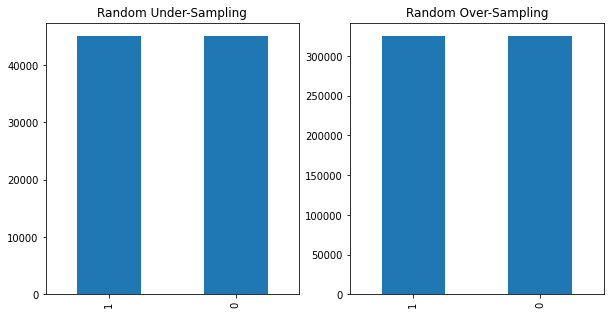

In [ ]:
# Random Under-Sampling
response_0_under = response_0.sample(response_count_1)
test_under = pd.concat([response_0_under, response_1], axis=0)

# Random Over-Sampling
response_1_over = response_1.sample(response_count_0, replace=True)
test_over = pd.concat([response_1_over, response_0], axis=0)

plt.figure(figsize=(10,5))
plt.subplot(121)
print("Random Under-Sampling:\n",test_under['Response'].value_counts())
test_under['Response'].value_counts().plot(kind='bar', title='Random Under-Sampling')
plt.subplot(122)
print("Random Over-Sampling\n",test_over['Response'].value_counts())
test_over['Response'].value_counts().plot(kind='bar', title='Random Over-Sampling')

#Logistic Regression

##Random Under-Sampling

In [ ]:
test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90310 entries, 377319 to 381097
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     90310 non-null  int64  
 1   Gender                 90310 non-null  int64  
 2   Age                    90310 non-null  int64  
 3   Driving_License        90310 non-null  int64  
 4   Region_Code            90310 non-null  float64
 5   Previously_Insured     90310 non-null  int64  
 6   Vehicle_Damage         90310 non-null  int64  
 7   Annual_Premium         90310 non-null  float64
 8   Policy_Sales_Channel   90310 non-null  float64
 9   Vintage                90310 non-null  int64  
 10  Response               90310 non-null  int64  
 11  vehicle_age_1-2 Year   90310 non-null  uint8  
 12  vehicle_age_< 1 Year   90310 non-null  uint8  
 13  vehicle_age_> 2 Years  90310 non-null  uint8  
dtypes: float64(3), int64(8), uint8(3)
memory usage: 

In [ ]:
df_under = test_under.drop(['Driving_License','vehicle_age_> 2 Years','id'], axis=1)
df_under

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_1-2 Year,vehicle_age_< 1 Year
377319,1,30,28.0,1,0,29936.0,26.0,23,0,1,0
29389,1,22,15.0,0,1,42162.0,26.0,186,0,0,1
347552,0,26,13.0,1,1,26862.0,152.0,167,0,0,1
264683,0,25,3.0,1,0,23143.0,152.0,116,0,0,1
147280,0,22,17.0,0,1,33619.0,26.0,133,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
381057,1,40,46.0,0,1,27508.0,26.0,189,1,1,0
381061,0,41,28.0,0,1,37377.0,124.0,99,1,1,0
381073,0,46,28.0,0,1,34741.0,124.0,167,1,1,0
381075,0,61,28.0,0,1,43875.0,26.0,139,1,1,0


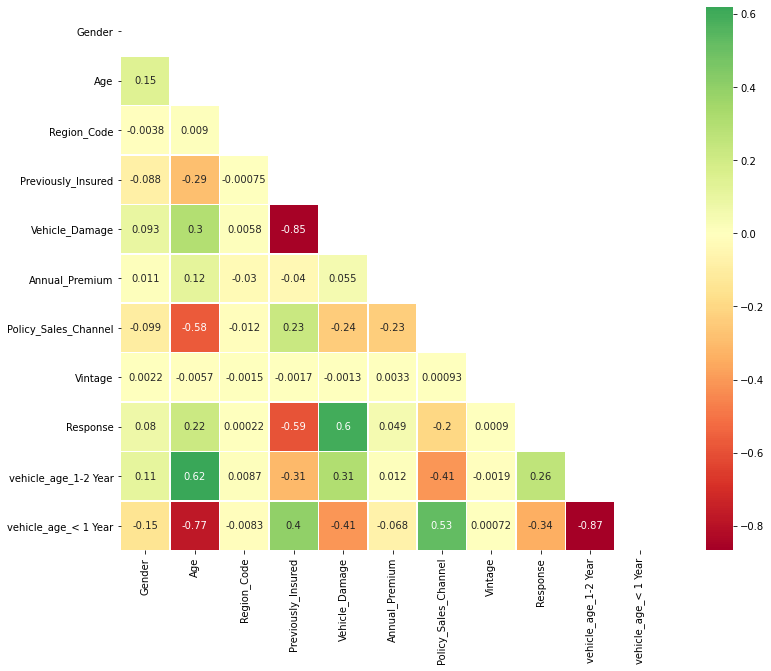

In [ ]:
corr = df_under.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdYlGn", center=0,
            square=True, linewidths=.5)

### Train Test Split

In [ ]:
X = df_under.drop('Response', axis=1)
y = df_under.Response

x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.3, random_state=10)

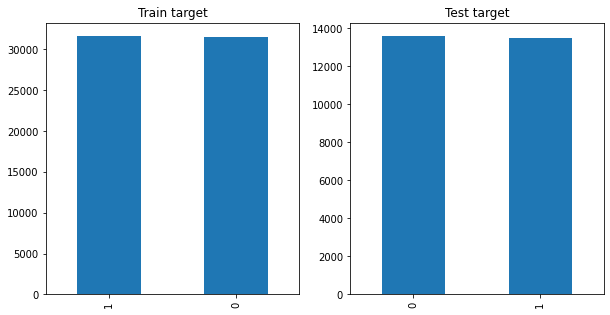

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Train target')
y_train_under.value_counts().plot(kind='bar')
plt.subplot(122)
plt.title('Test target')
y_test_under.value_counts().plot(kind='bar')

### Model

In [ ]:
# Create model - use solver='liblinear'
clf_lr_under = LogisticRegression(random_state=0, solver='liblinear')

# Train model
clf_lr_under.fit(x_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict
lr_y_pred_under = clf_lr_under.predict(x_test_under)

print(f'Test data accuracy score: {np.round(clf_lr_under.score(x_test_under, y_test_under), 2)*100}%')
print(f'Cross val score: {np.mean(cross_val_score(clf_lr_under, X, y, cv=5, n_jobs=-1)).round(2)}')

Test data accuracy score: 78.0%
Cross val score: 0.78


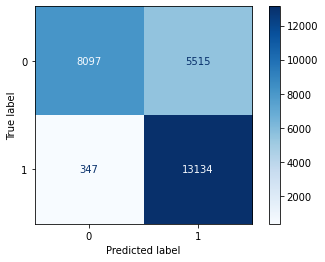

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_lr_under, x_test_under, y_test_under, cmap='Blues', values_format='d')

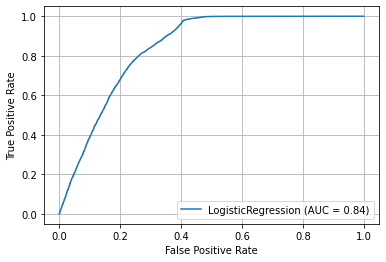

In [ ]:
# AUC ROC curve
plot_roc_curve(clf_lr_under, x_test_under, y_test_under)
plt.grid()

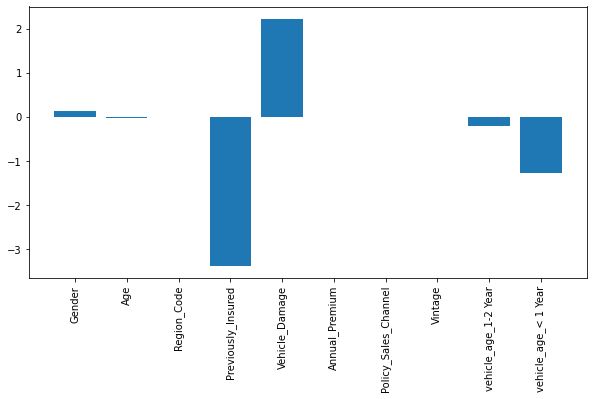

In [ ]:
clf_lr_under.coef_
plt.figure(figsize=(10, 5))
plt.bar(x_train_under.columns, clf_lr_under.coef_[0])
plt.xticks(rotation=90)
plt.show()

## Random Over-Sampling

In [ ]:
test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651268 entries, 73128 to 381108
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     651268 non-null  int64  
 1   Gender                 651268 non-null  int64  
 2   Age                    651268 non-null  int64  
 3   Driving_License        651268 non-null  int64  
 4   Region_Code            651268 non-null  float64
 5   Previously_Insured     651268 non-null  int64  
 6   Vehicle_Damage         651268 non-null  int64  
 7   Annual_Premium         651268 non-null  float64
 8   Policy_Sales_Channel   651268 non-null  float64
 9   Vintage                651268 non-null  int64  
 10  Response               651268 non-null  int64  
 11  vehicle_age_1-2 Year   651268 non-null  uint8  
 12  vehicle_age_< 1 Year   651268 non-null  uint8  
 13  vehicle_age_> 2 Years  651268 non-null  uint8  
dtypes: float64(3), int64(8), uint8(3

In [ ]:
df_over = test_over.drop(['Driving_License','vehicle_age_> 2 Years','id'], axis=1)
df_over

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_1-2 Year,vehicle_age_< 1 Year
73128,1,38,28.0,0,1,53072.0,152.0,215,1,1,0
301747,0,62,3.0,0,1,24077.0,26.0,273,1,1,0
200730,1,58,28.0,0,1,50119.0,26.0,181,1,0,0
242097,1,41,28.0,0,0,27120.0,26.0,258,1,1,0
197647,1,54,46.0,0,1,27023.0,26.0,230,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,26.0,1,0,30170.0,26.0,88,0,1,0
381105,1,30,37.0,1,0,40016.0,152.0,131,0,0,1
381106,1,21,30.0,1,0,35118.0,160.0,161,0,0,1
381107,0,68,14.0,0,1,44617.0,124.0,74,0,0,0


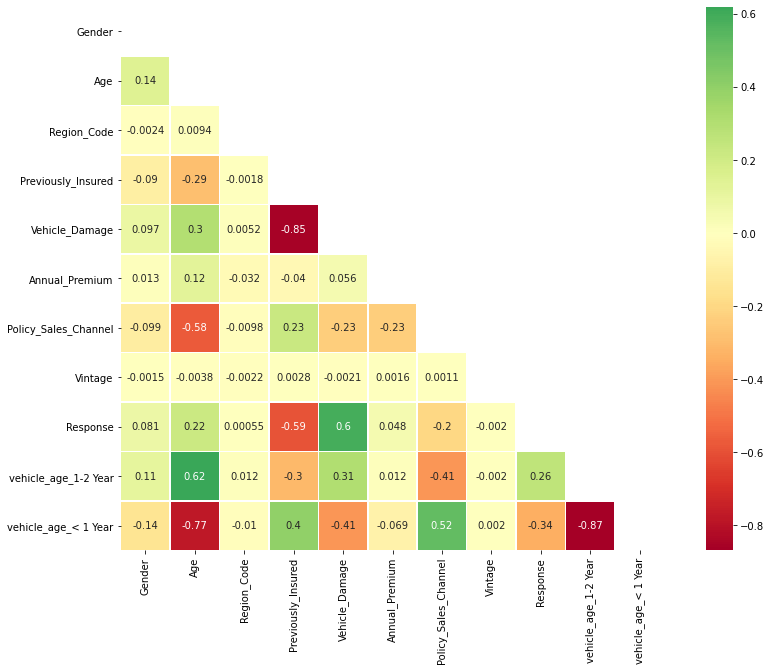

In [ ]:
corr = df_over.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdYlGn", center=0,
            square=True, linewidths=.5)

### Train Test Split

In [ ]:
X = df_over.drop('Response', axis=1)
y = df_over.Response

x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.3, random_state=10)

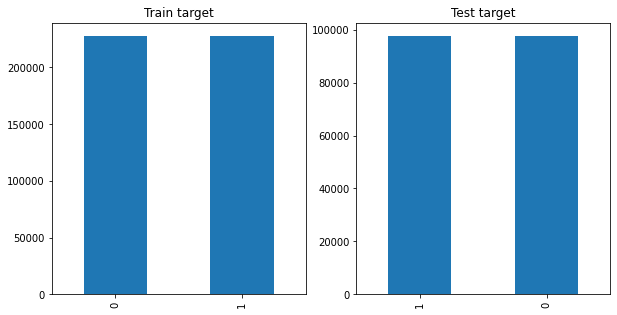

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Train target')
y_train_over.value_counts().plot(kind='bar')
plt.subplot(122)
plt.title('Test target')
y_test_over.value_counts().plot(kind='bar')

### Model

In [ ]:
# Create model - use solver='liblinear'
clf_lr_over = LogisticRegression(random_state=0, solver='liblinear')

# Train model
clf_lr_over.fit(x_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict
lr_y_pred_over = clf_lr_over.predict(x_test_over)

print(f'Accuracy: {np.round(clf_lr_over.score(x_test_over, y_test_over), 2)*100}%')
print(f'Cross val : {np.mean(cross_val_score(clf_lr_over, X, y, cv=5, n_jobs=-1)).round(2)}')

Accuracy: 78.0%
Cross val : 0.78


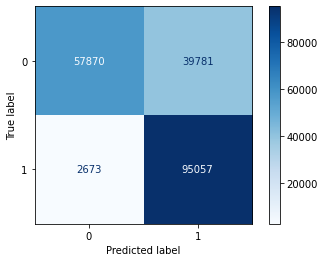

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_lr_over, x_test_over, y_test_over, cmap='Blues', values_format='d')

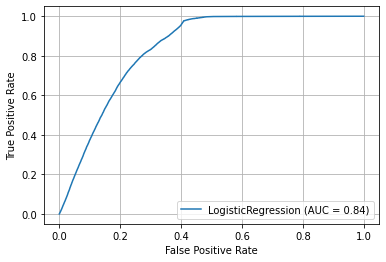

In [ ]:
# AUC ROC curve
plot_roc_curve(clf_lr_over, x_test_over, y_test_over)
plt.grid()

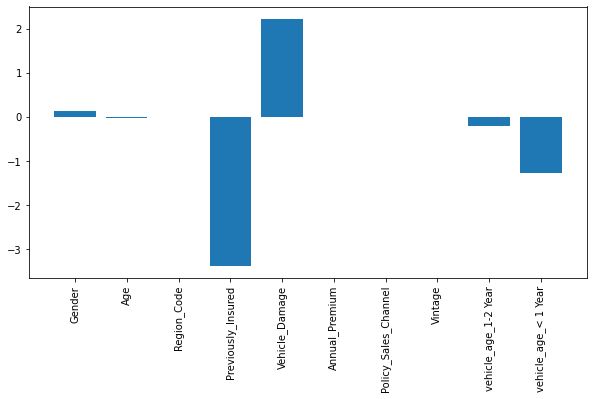

In [ ]:
clf_lr_over.coef_
plt.figure(figsize=(10, 5))
plt.bar(x_train_under.columns, clf_lr_under.coef_[0])
plt.xticks(rotation=90)
plt.show()